In [1]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.4/352.4 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.4/962.4 kB 7.3 MB/s eta 0:00:00a 0:00:01


In [12]:
!pip install squarify 

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
mydb = mysql.connector.connect(host="localhost",
                               user="root",
                               password="Welcome",
                               database='ecommerce_DB'
)

Text(0.5, 1.0, 'User Distribution')

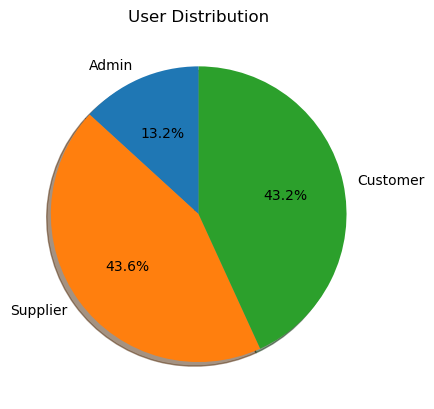

In [79]:
mycursor = mydb.cursor()
mycursor.execute("SELECT Role, COUNT(*) FROM Login GROUP BY Role")
myresult = mycursor.fetchall()

# Storing result as dataframe
df1 = pd.DataFrame(myresult)
df1.columns = ["Role", "Count"]

# Plot 1: Pie Chart for different type of user (Logins) in percentage
plt.pie(df1["Count"], labels = df1["Role"],
        autopct = '%1.1f%%', shadow = True,
        startangle = 90)
plt.title("User Distribution")
plt.show()

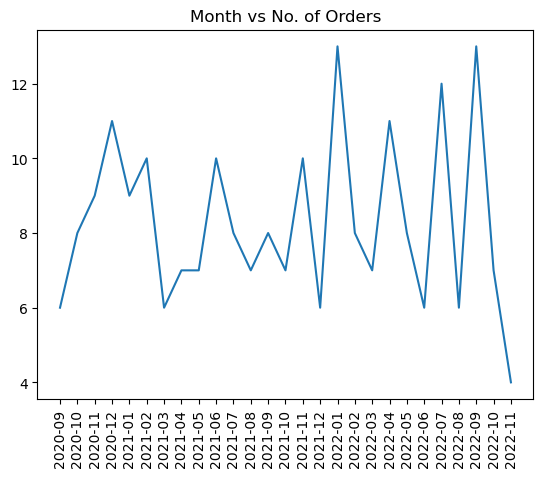

In [82]:
mycursor = mydb.cursor()
mycursor.execute("SELECT DATE_FORMAT(OrderDate, '%Y-%m') AS Order_Date, COUNT(*) FROM Orders GROUP BY Order_Date ORDER BY Order_Date")
myresult = mycursor.fetchall()

# Storing result as dataframe
df2 = pd.DataFrame(myresult)
df2.columns = ["OrderDate", "Count"]

# Plot 2: Line Graph of orders per month for every year
plt.plot(df2["OrderDate"], df2["Count"])
plt.title("Month vs No. of Orders")
plt.xticks(rotation = 90)
plt.show()

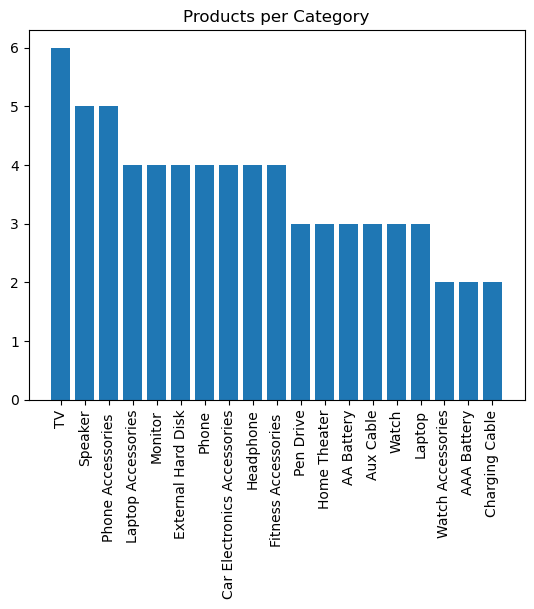

In [83]:
mycursor = mydb.cursor()
mycursor.execute("SELECT C.CategoryName, COUNT(P.ProductID) FROM Product P, Category C WHERE P.CategoryID = C.CategoryID GROUP BY C.CategoryID ORDER BY COUNT(P.ProductID) DESC")
myresult = mycursor.fetchall()

# Storing result as dataframe
df3 = pd.DataFrame(myresult)
df3.columns = ["Category Name", "Count"]

# Plot 3: Bar Graph of number of products per category
plt.bar(df3["Category Name"], df3["Count"])
plt.title("Products per Category")
plt.xticks(rotation = 90)
plt.show()

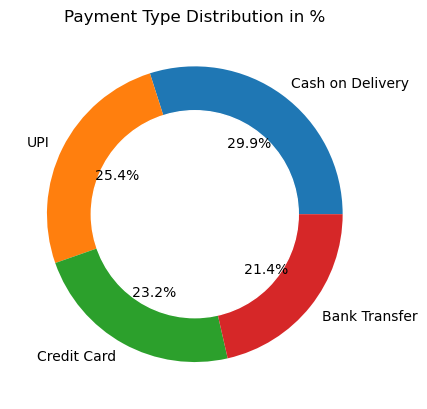

In [84]:
mycursor = mydb.cursor()
mycursor.execute("SELECT PaymentType,count(PaymentType) FROM Payment GROUP BY PaymentType ORDER BY count(PaymentType) DESC")
myresult = mycursor.fetchall()

# Storing result as dataframe
df4 = pd.DataFrame(myresult)
df4.columns = ["PaymentType", "Count"]

# Plot 4: Donut Chart for payment type distribution in percentage
data = df4["Count"]
total = sum(data)
data_per = data / total * 100
plt.pie(data_per, labels = df["PaymentType"],
        autopct = '   %1.1f%%  ')
circle = plt.Circle((0,0), 0.7, color = "white")
plt.title("Payment Type Distribution in %")
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

Text(0.5, 1.0, 'Distribution of Customer by AGE')

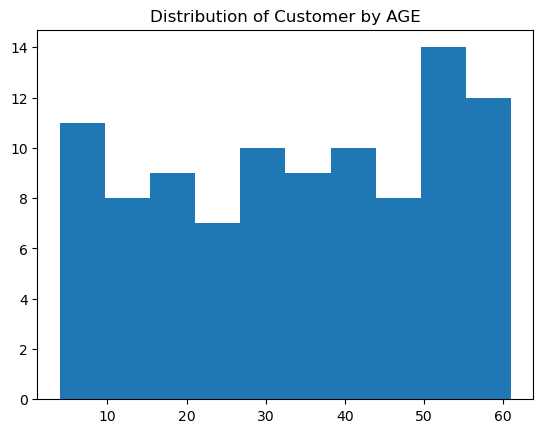

In [85]:
mycursor = mydb.cursor()
mycursor.execute("SELECT DATE_FORMAT(FROM_DAYS(DATEDIFF(now(), DOB)), '%Y')+0 FROM Customer AS AGE")
myresult = mycursor.fetchall()

# Storing result as dataframe
df5 = pd.DataFrame(myresult)
df5.columns = ["Age"]

# Plot 5: Histogram of distribution of customers by age
df5["Age"] = df5["Age"].astype(int)
plt.hist(df5["Age"])
plt.title("Distribution of Customer by Age")
plt.show()

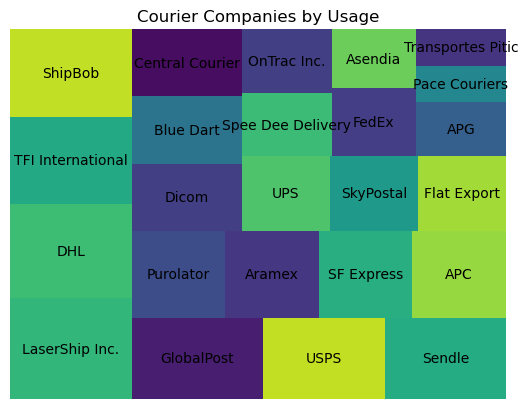

<Figure size 5000x450 with 0 Axes>

In [86]:
mycursor = mydb.cursor()
mycursor.execute("SELECT C.CompanyName, COUNT(O.OrderID) FROM Orders O, CCourier C WHERE O.CourierID = C.CourierID GROUP BY C.CourierID ORDER BY COUNT(O.OrderID) DESC")
myresult = mycursor.fetchall()

# Storing result as dataframe 
df6 = pd.DataFrame(myresult)
df6.columns = ["Courier Company Name", "Count"]

# Plot 6: Tree Map of courier companies preferred
squarify.plot(sizes = df6["Count"], label = df6["Courier Company Name"])
plt.axis('off')
plt.title("Courier Companies by Usage")
fig1 = plt.figure()
fig1.set_size_inches(50, 4.5)
plt.show()

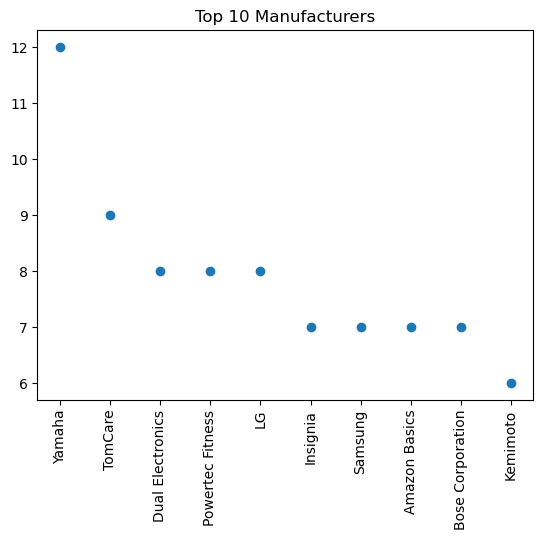

In [88]:
mycursor = mydb.cursor()

mycursor.execute("SELECT P.ProductName,P.Manufacturer,Count(O.OrderID) FROM OrderItems O, Product P WHERE O.ProductID = P.ProductID  GROUP BY P.ProductID ORDER BY count(O.OrderID) DESC LIMIT 10 ")

myresult = mycursor.fetchall()

import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(myresult)
df.columns = ["Product Name","Manufacturer", "Count"]

plt.scatter(df["Manufacturer"], df["Count"])
plt.title("Top 10 Manufacturers")
plt.xticks(rotation=90)
plt.show()

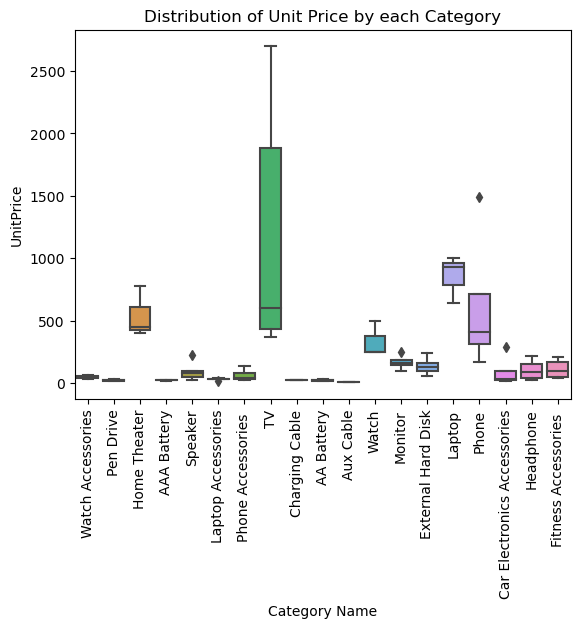

In [91]:
mycursor = mydb.cursor()

mycursor.execute("SELECT C.CategoryName, CAST(P.UnitPrice as unsigned) FROM Category C, Product P WHERE C.CategoryID = P.CategoryID ")

myresult = mycursor.fetchall()

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.DataFrame(myresult)
df.columns = ["Category Name","UnitPrice"]

import seaborn as sns
 
sns.boxplot(x ='Category Name', y ='UnitPrice', data = df)
plt.xticks(rotation=90)
plt.title("Distribution of Unit Price by each Category")
plt.show()

In [ ]:
()